# 사이킷런을 타고 떠나는 머신러닝 분류 모델 여행

* 3.1 분류 알고리즘 선택
* 3.2 사이킷런 첫걸음: 퍼셉트론 훈련
* 3.3 로지스틱 회귀를 사용한 클래스 확률 모델링
* 3.4 서포트 벡터 머신을 사용한 최대 마진 분류
* 3.5 커널 SVM을 사용하여 비선형 문제 풀기
* 3.6 결정 트리 학습
* 3.7 k-접근점 이웃: 게으른 학습 알고리즘


## 3.1 분류 알고리즘 선택

분류 모델의 예측 성능과 계산 능력은 학습하려는 데이터에 크게 의존한다.

>데이터의 크기, 차원, 특성, 클래스의 수, 클래스의 분포, 클래스의 불균형 여부, 데이터의 선형적 분리 가능 여부 등을 고려해야 한다.

머신 러닝 알고리즘을 훈련하기 위한 주요 단계

1. 특성을 선택하고 훈련 데이터를 수집한다.
2. 성능 지표를 선택한다.
3. 학습 알고리즘을 선택하고 모델을 훈련한다.
4. 모델의 성능을 평가한다.
5. 알고리즘 설정을 바꾸고 모델을 튜닝한다.

## 3.2 사이킷런 첫걸음: 퍼셉트론 훈련

붓꽃 데이터셋을 사용하여 퍼셉트론 모델을 훈련한다.

150개의 붓꽃 샘플에서 2개의 클래스를 분류하는 이진 분류 문제로 변환한다.(setosa와 versicolor)

꽃잎 길이와 꽃잎 너비를 특성 행렬 X에 저장하고, 클래스 레이블은 특성 벡터 y에 저장한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target']) # type: ignore
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names) # type: ignore
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


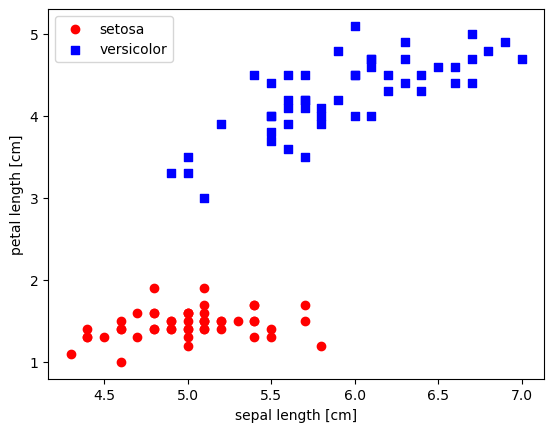

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor를 선택합니다.
y = iris_df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# 꽃받침 길이와 꽃잎 길이를 추출합니다.
X = iris_df.iloc[0:100, [0, 2]].values

# 산점도를 그립니다.
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [3]:
X = iris.data[:, [2, 3]] # type: ignore
y = iris.target #type: ignore
print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


`np.unique(y)`를 사용하여 클래스 레이블을 확인한다.

In [4]:
# check class labels
print(iris_df['species'].unique())

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']


**데이터셋 분할**

훈련 데이터셋과 테스트 데이터셋을 분할한다.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # stratify=y를 사용하여 계층화 샘플링을 수행합니다.
print("y의 레이블 카운트:", np.bincount(y))
print("y_train의 레이블 카운트:", np.bincount(y_train))
print("y_test의 레이블 카운트:", np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


In [6]:
# 특성을 표준화합니다. sklearn의 StandardScaler를 사용하여 특성을 표준화합니다.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

**퍼셉트론 모델 훈련**

* 사이킷런의 Perceptron 클래스를 사용하여 퍼셉트론 모델을 훈련한다.
* 사이킷런 알고리즘은 대부분 기본적으로 OvR(One-versus-Rest) 방식을 사용하여 다중 분류(mutliclass classification)를 지원한다.

In [7]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [8]:
y_pred = ppn.predict(X_test_std)
print("잘못 분류된 샘플 개수: %d" % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


In [9]:
from sklearn.metrics import accuracy_score
print("정확도: %.2f" % accuracy_score(y_test, y_pred))

정확도: 0.98


In [10]:
print("정확도: %.2f" % ppn.score(X_test_std, y_test))

정확도: 0.98


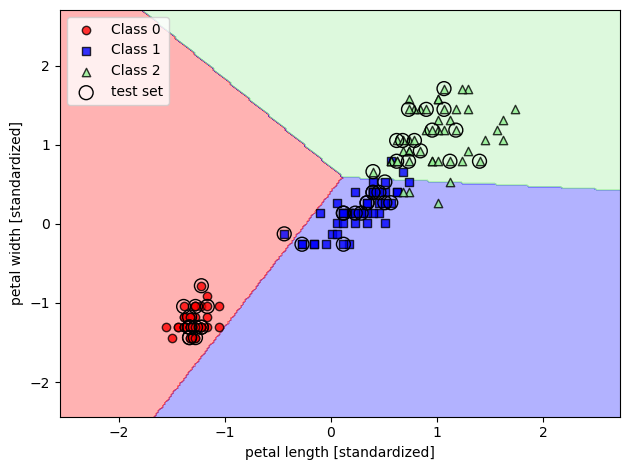

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



def plot_dicision_regions(X, y, classifier: Perceptron, test_idx=None, resolution=0.02):
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  
  # 결정 경계를 그립니다.
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=f"Class {cl}", edgecolor='black')
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    X_test, y_test = X[test_idx, :], y[test_idx]
    
    plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')
X_combined_std = np.vstack((X_train_std, X_test_std)) # type: ignore
y_combined = np.hstack((y_train, y_test))
plot_dicision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 3.3 로지스틱 회귀를 사용한 클래스 확률 모델링

* 퍼셉트론은 선형 분류 모델이다.
* 클래스가 선형적으로 구분되지 않을 때 퍼셉트론은 수렴하지 않는다.
* 로지스틱 회귀는 회기가 아니라 분류 모델이다.

### 3.3.1 로지스틱 회귀의 이해와 조건부 확률

* 로지스틱 회귀는 선형 결합을 시그모이드 함수에 적용하여 클래스 확률을 예측한다.
* 로지스틱 회귀는 이진 분류를 위한 선형 모델이다.

**오즈비**

* 오즈는 특정 이벤트가 발생할 확률$\frac{p}{(1-p)}$이다. 이때 p는 양성 샘플이 발생할 확률이다.
* 양성 샘플은 타깃 클래스에 속하는 샘플이다.
* 확률 $p$를 특성$x$인 샘플이 클래스 1에 속할 확률$p:=P(y=1|x)$로 정의할 수 있다.

오즈비에 로그를 취한 로짓 함수를 사용하여 선형 결합을 계산한다.
$$
logit(p) = log\frac{P}{1-P}
$$

log는 컴퓨터 과학에서 자연로그를 의미한다. logit함수는 0과 1사이의 입력값을 받아 실수 범위로 변환한다.

로지스틱 모델에서는 가중치가 적용된 입력과 로그 오즈 사이에 선형 관계가 있다고 가정한다.

$$
logit(p) = w_{1}x_{1} + ... + w_{m}x_{m} + b = \sum_{i=j}w_{i}x_{j} = w^{T}x + b
$$

logit함수를 거꾸로 뒤집으면 로지스틱 시그모이드 함수(logistic sigmoid function)가 된다.
$$
\phi(z) = \frac{1}{1+e^{-z}}
$$

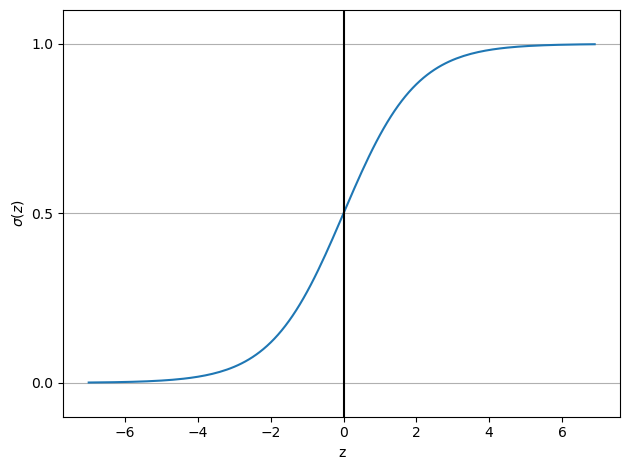

In [12]:
# 시그모이드 함수 그려보기

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel(r'$\sigma (z)$')
# y축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

* $z$가 무한대로 가면$(z \rightarrow \infty)e^{-z}$가 매우 작아지기 때문에$\sigma(z)$는 1에 가까워진다.
* 비슷하게 $z \rightarrow -\infty$로 가면$\sigma(z)$는 0에 가까워진다.
* 중간 값은 $\sigma(0) = 0.5$이다.
* 아달린에서 활성화 함수로 항등함수$\phi(z) = z$를 사용했지만 로지스틱 회귀에서는 로지스틱 시그모이드 함수를 사용한다.
* 가중치와 절편 파라미터 $w$와 $b$를 사용하여 특성$x$에 대한 시그모이드 함수의 출력을 특정 샘플이 클래스 1에 속확 활률 $\sigma(z)=0.8$이라면 이 샘플은 Iris-Versicolor일 확률이 80%라는 뜻이다.
  * 이 샘플이 Iris-Setosa일 확률은 $p(y=0|x; w, b) = 1-p(y=1|x; w, b)$처럼 계산되어 20%이다.
* 예측은 임계 함수를 사용하여 이 확률을 클래스 레이블로 변환한다.
$$
\hat{y} = \begin{cases} 1 & \text{if} \phi(z) \geq 0.5 \\ 0 & \text{otherwise} \end{cases}
$$

### 3.3.2 로지스틱 손실 함수의 가중치 학습

로지스틱 회귀 모델을 훈련하기 위해 가중치를 학습하는 것은 선형 회귀 모델과 비슷하다.

**평균 제곱 오차 손실 함수**
$$
L(w,b|x) = \sum_{i}\frac{1}{2}(\sigma(z^{(i)} - y^{(i)})^{2}
$$

* 아달린 분류 모델에서 이 함수를 최소화하는 파라미터를 학습한다.

로지스틱 회귀 모델을 만들 때 최대화 하려는 가능도(likelihood)를 정의한다.

$$
L(w,b) = p(y|x;w,b)  \\
= \prod_{i=1}^{n}p(y^{(i)}|x^{(i)};w,b) \\
= \prod_{i=1}^{n}(\sigma(z^{(i)}))^{y^{(i)}}(1-\sigma(z^{(i)}))^{1-y^{(i)}}
$$

* 로그 함수를 적용하면 가능도가 매우 작을 때 일어나는 수치상의 언더플로(underflow)를 방지할 수 있다.
* 계수의 곱을 계수의 합으로 변환할 수 있다.

**로그 가능도 함수 유도하기**
---
데이터가 주어졌을 때 가능도$L(w,b|x)$에 대한 표현식을 유도한다.

클래스 레이블이 0과 1인 이진 분류 문제일 경우 레이블 1을 베르누이 변수(Bernoulli variable)Y~Bern(p)로 생각할 수 있다.

이 변수는 p의 확률로 1또는 0 두 값을 가질 수 있다.

하나의 데이터 포인트에 대해 아 확률을 $P(Y=1|X=x^{(i)} = \sigma(z^{(i)}))와P=(Y=0|X=x^{(i)})=1-\sigma(z^{(i)})$로 표현할 수 있다.

두 식을 합치고 $P(Y=y^{(i)}|X=x^{(i)})=p(y^{(i)}|x^{(i)})$를 사용하여 하나의 식으로 표현할 수 있다.

$$
p(y^{(i)}|x^{(i)}) = (\sigma(z^{(i)}))^{y^{(i)}}(1-\sigma(z^{(i)}))^{1-y^{(i)}}
$$

모든 훈련 샘플이 독립적이라는 가정하에 모든 에빈트가 발생할 확률을 계산하는 곱셈 규칙을 사용하여 훈련 레이블의 가능도를 계산할 수 있다.

$$
L(w,b|x) = \prod_{i=1}^{n}p(y^{(i)}|x^{(i)};w,b)
$$

이제 베르누이 변수의 확률 질량 함수로 대처하면 모델 파라미터 업데이트를 통해 최대화시킬 가능도도 공식을 유도할 수 있다.

$$
L(w,b|x) = \prod_{i=1}^{n}(\sigma(z^{(i)}))^{y^{(i)}}(1-\sigma(z^{(i)}))^{1-y^{(i)}}
$$

경사 상승법 같은 최적화 알고리즘을 사용하여 이 로그 가능도 함수를 최대화할 수 있다.

또는 로그 가능도 함수를 다시 손실 함수(L)로 표현하여 경사 하강법을 사용하여 최소화할 수 있다.

$$
L(w,b) = \sum_{i=1}^{n}[y^{(i)}log(\sigma(z^{(i)})) - (1-y^{(i)})log(1-\sigma(z^{(i)}))]
$$

***샘플 계산***

$$
L(\sigma(z), y;w,b) = -ylog(\sigma(z)) -1 (1-y)log(1-\sigma(z))
$$

y가 0일 때 첫 번째 항이 0이 된다. y가 1일 때 두 번째 항이 0이 된다.

$$
L(\sigma(z), y; w,b) = \begin{cases} -log(\sigma(z)) & \text{if} y=1 \\ -log(1-\sigma(z)) & \text{if} y=0 \end{cases}

$\sigma(z)$가 1에 가까워지면 첫 번째 항이 0에 가까워진다. $\sigma(z)$가 0에 가까워지면 두 번째 항이 0에 가까워진다.

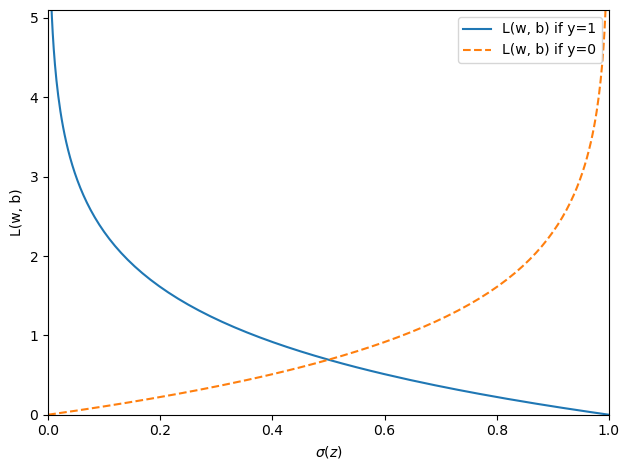

In [13]:
def loss1(z):
  return -np.log(sigmoid(z))

def loss0(z):
    return -np.log(1-sigmoid(z))
  
z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
c0 = [loss0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel(r'$\sigma (z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

클래스 1에 속한 샘플을 정확히 예측하면 손실이 0에 가까워진다.

클래스 0에 속한 샘플을 정확히 예측하면 손실이 0에 가까워진다.

예측이 잘못되면 손실이 무한대가 된다.


### 3.3.3 아달린 구현을 로지스틱 회귀 알고리즘으로 변경

$$
L(w,b) = \frac{1}{n}\sum_{i=1}^{n}[-y^{(i)}log(\sigma(z^{(i)})) - (1-y^{(i)})log(1-\sigma(z^{(i)}))]
$$

이 함수로 에포크마다 모든 훈련 샘플을 분류하는 손실을 계산한다.

선형 활성화 함수를 시그모이드 활성화로 바꾸어야한다.

In [14]:
class LogisticRegressionGD:
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
    
  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_
  
  def activation(self, z):
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.b_ = np.float_(0.)
    self.losses_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
      self.b_ += self.eta * 2.0 * errors.mean()
      loss = (-y.dot(np.log(output) - ((1 - y).dot(np.log(1 -output)))) / X.shape[0])
      self.losses_.append(loss)
    return self
  
  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)  

여기에서 직접 구현한 로지스틱 모델은 이진 분류 문제에만 적용할 수 있다.

Iris-setosa와 Iris-versicolor를 분류하는 이진 분류 문제에 적용할 수 있다.

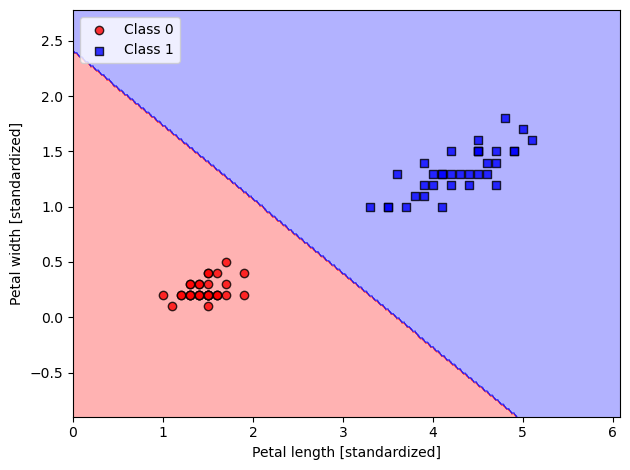

In [15]:
import matplotlib.pyplot as plt
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_dicision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd) # type: ignore
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

### 3.3.4 사이킷런을 사용하여 로지스틱 회귀 모델 훈련

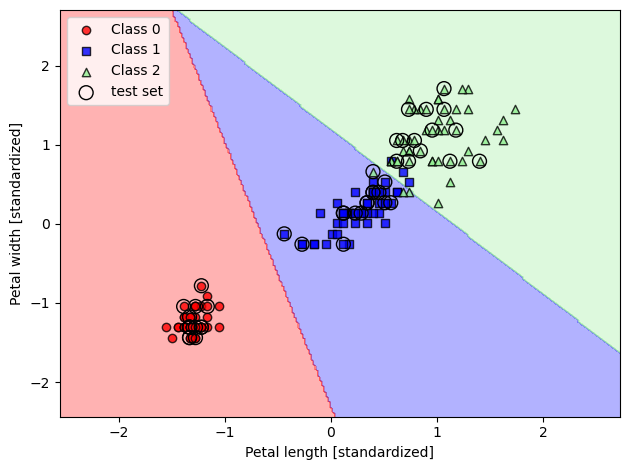

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1, multi_class='ovr')

lr.fit(X_train_std, y_train)
plot_dicision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150)) # type: ignore
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

LogisticRegression모델을 훈련할때 "C"매개변수를 사용하여 규제의 강도를 조절할 수 있다.

훈련 샘플이 어떤 클래스에 속할 확률은 predict_proba메서드를 사용하여 계산한다.
```python
lr.predict_proba(X_test_std[:3, :])
```
```shell
array([[0.815, 0.185],
       [0.828, 0.172],
       [0.828, 0.172]])
```

첫 번째 행은 첫번째 붓꽃의 클래스에 소속할 확률을 나타낸다.

두 번째 행은 두 번째 붓꽃의 클래스에 소속할 확률을 나타낸다.

열을 모두 더하면 1이 된다.